<a href="https://www.kaggle.com/code/mariuszcha/predicting-netflix-stock-using-lstm-tf-pytorch?scriptVersionId=129063427" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The main purpose of an LSTM network is to process and analyze sequences of data, so it should perform quite well on stock market. Obviously predicting Stock Market is close to impossible. There are many, many different factors which determine price and move of the stock, and we can't follow them all. Fluctuation of the market is an inseparable element.
But still - Stock Market - especially past data - is great source of datasets which we can you to practice new things.

**LSTM**

LSTMs are a type of recurrent neural network (RNN) that are designed to better handle long-term dependencies in sequential data.
The memory cell is controlled by three gates: the input gate, the forget gate, and the output gate. The input gate decides which values to update in the cell based on the current input, the forget gate decides which values to keep or discard from the previous cell state based on the current input, and the output gate decides which values from the current cell state to output.
LSTMs are able to learn complex patterns in sequential data because they can selectively remember or forget information from previous inputs and states. 

### Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette('flare')
#plt.style.use('dark_background')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
time_interval = 60
epochs = 10
batch = 32

### Some functions and our LSTM model:

In [3]:
def preprocessing(data):
    data.set_index('Date', inplace=True)
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    
    training_size = int(len(scaled_data) * 0.75)
    test_size = len(scaled_data) - training_size
    train_data, test_data = scaled_data[0:training_size, :], scaled_data[training_size:len(scaled_data), :]
    
    return train_data, test_data, scaler

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

def plotter(y_pred, y_test):
    sns.lineplot(y_test, palette=['g'])
    sns.lineplot(y_pred, palette=['r'])

def LSTM_Tensor(input_shape, epochs, batch):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch, verbose=1)
    return model

# For 1 variable:

Epoch 1/10
117/117 [==============================] - 11s 9ms/step - loss: 2.4327e-04
Epoch 2/10
117/117 [==============================] - 1s 9ms/step - loss: 6.6926e-05
Epoch 3/10
117/117 [==============================] - 1s 8ms/step - loss: 5.0629e-05
Epoch 4/10
117/117 [==============================] - 1s 9ms/step - loss: 5.0228e-05
Epoch 5/10
117/117 [==============================] - 1s 8ms/step - loss: 5.3629e-05
Epoch 6/10
117/117 [==============================] - 1s 8ms/step - loss: 4.4805e-05
Epoch 7/10
117/117 [==============================] - 1s 8ms/step - loss: 4.6832e-05
Epoch 8/10
117/117 [==============================] - 1s 8ms/step - loss: 3.7850e-05
Epoch 9/10
117/117 [==============================] - 1s 13ms/step - loss: 3.8210e-05
Epoch 10/10
38/38 [==============================] - 1s 4ms/step


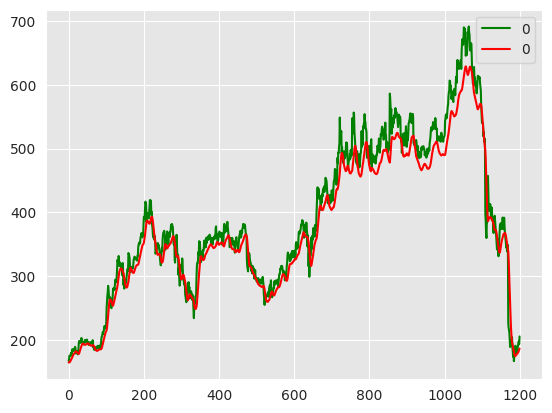

In [4]:
# Data
data = pd.read_csv('/kaggle/input/netflix-stock-price-data-set-20022022/NFLX.csv', date_parser=True)
data = data[['Date', 'Close']]

train_data, test_data, scaler = preprocessing(data)

X_train, y_train = create_dataset(train_data, time_interval)
X_test, y_test = create_dataset(test_data, time_interval)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

x = (X_train.shape[1], 1)
model = LSTM_Tensor(x, epochs, batch)

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plotter(y_pred, y_test)

# More variables:

Epoch 1/10
117/117 [==============================] - 5s 9ms/step - loss: 2.3930e-04
Epoch 2/10
117/117 [==============================] - 1s 9ms/step - loss: 6.7999e-05
Epoch 3/10
117/117 [==============================] - 1s 8ms/step - loss: 5.3671e-05
Epoch 4/10
117/117 [==============================] - 1s 9ms/step - loss: 5.4817e-05
Epoch 5/10
117/117 [==============================] - 1s 8ms/step - loss: 5.0955e-05
Epoch 6/10
117/117 [==============================] - 1s 8ms/step - loss: 5.2773e-05
Epoch 7/10
117/117 [==============================] - 1s 9ms/step - loss: 4.2357e-05
Epoch 8/10
117/117 [==============================] - 1s 8ms/step - loss: 4.0812e-05
Epoch 9/10
117/117 [==============================] - 1s 8ms/step - loss: 3.8663e-05
Epoch 10/10
38/38 [==============================] - 1s 4ms/step


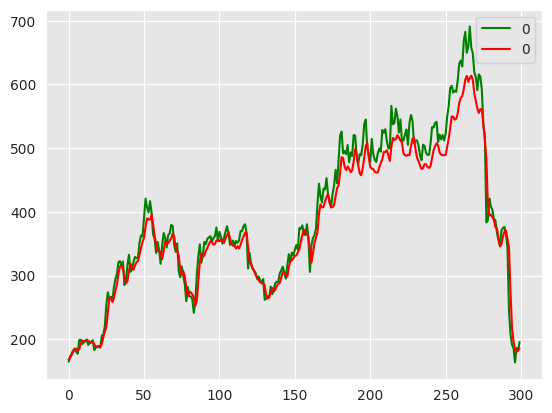

In [5]:
# Data
data = pd.read_csv('/kaggle/input/netflix-stock-price-data-set-20022022/NFLX.csv', date_parser=True)
data = data[['Date', 'Open', 'Close', 'High', 'Low']]

train_data, test_data, scaler = preprocessing(data)

X_train, y_train = create_dataset(train_data, time_interval)
X_test, y_test = create_dataset(test_data, time_interval)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

x = (X_train.shape[1], X_train.shape[2])
model = LSTM_Tensor(x, epochs, batch)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 4) 
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:, 1].reshape(-1,1)
y_test = y_test.reshape(-1, 4) 
y_test = scaler.inverse_transform(y_test)
y_test = y_test[:, 1].reshape(-1,1)

plotter(y_pred, y_test)